In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam 
from matplotlib import pyplot as plt



In [2]:
def generate_gaussians_distributions(sep=1, N=500, random_state=42, normalize=True):
    np.random.seed(random_state)
    # Zeros
    X1 = np.random.multivariate_normal(sep*np.array([0.5, 0.5]), [[0.1,-0.085],[-0.085,0.1]], N//2)
    # Ones
    X2 = np.random.multivariate_normal([-0.25, -0.25], [[0.1,0],[0,0.1]], N//2)
    X = np.append(X1, X2, axis=0)
    y = np.append(np.zeros(N//2), np.ones(N//2))
    indexes = np.arange(len(y))
    np.random.shuffle(indexes)
    if normalize:
        X = (X - X.mean(axis=0))/X.std(axis=0)
    else:
        X[:, 0] = X[:, 0]
        X[:, 1] = X[:, 1]
    return X[indexes], y[indexes]

In [3]:
X, y = generate_gaussians_distributions(sep=0.5, N = 500, normalize=False, random_state=41)
X_test, y_test = generate_gaussians_distributions(sep=0.5, N = 500, normalize=False, random_state=42)

In [4]:
model = Sequential()

In [5]:
model.add(Dense(1, input_shape=(2,),activation='sigmoid'))

In [6]:
optimizer = Adam(learning_rate=0.1)

In [7]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
history = model.fit(X, y, epochs=100, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/100
8/8 [==============================] - 1s 26ms/step - loss: 0.7922 - accuracy: 0.2480 - val_loss: 0.7843 - val_accuracy: 0.2880
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.7899 - accuracy: 0.2560 - val_loss: 0.7821 - val_accuracy: 0.2940
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.7876 - accuracy: 0.2620 - val_loss: 0.7799 - val_accuracy: 0.2960
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.7854 - accuracy: 0.2640 - val_loss: 0.7778 - val_accuracy: 0.2980
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.7832 - accuracy: 0.2660 - val_loss: 0.7757 - val_accuracy: 0.2980
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.7810 - accuracy: 0.2700 - val_loss: 0.7735 - val_accuracy: 0.3060
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 0.7789 - accuracy: 0.2760 - val_loss: 0.7714 - val_accuracy: 0.3100
Epoch 8/100
8/8 [=========

In [10]:
print(model.layers[0].get_weights())

[array([[-0.81809497],
       [ 0.01076893]], dtype=float32), array([0.01309625], dtype=float32)]


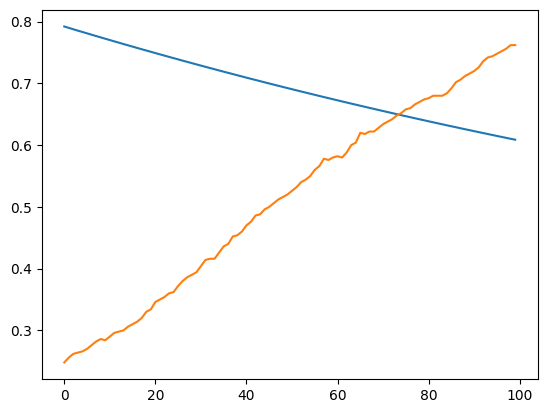

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.show()
